In [ ]:
# 03. Regressão Ridge (L2) para Regularização
# Setup

library(glmnet)


library(MASS)


library(caret)


data(Boston)


set.seed(42)

Carregando pacotes exigidos: Matrix

Loaded glmnet 4.1-10

Carregando pacotes exigidos: ggplot2

Carregando pacotes exigidos: lattice



In [ ]:
# Preparação	
# 1. Criar a matriz de atributos (X) e o vetor alvo (y)
# model.matrix é essencial para glmnet: converte features
# categóricos em dummy variables e remove intercept.


X <- model.matrix(medv ~ ., data = Boston)[, -1]


y <- Boston$medv

In [3]:
# Particionamento para treino e teste


train_indices <- createDataPartition(y, p = 0.7, list = FALSE)


X_treino <- X[train_indices, ]


y_treino <- y[train_indices]


X_teste <- X[-train_indices, ]


y_teste <- y[-train_indices]

In [ ]:
# 2. Treinamento com Validação Cruzada (alpha=0 para Ridge)
# cv.glmnet busca o melhor lambda que minimiza o erro.


cv_ridge <- cv.glmnet(X_treino, y_treino, alpha = 0, nfolds = 10)

Lambda Mínimo (L2): 0.6614818 


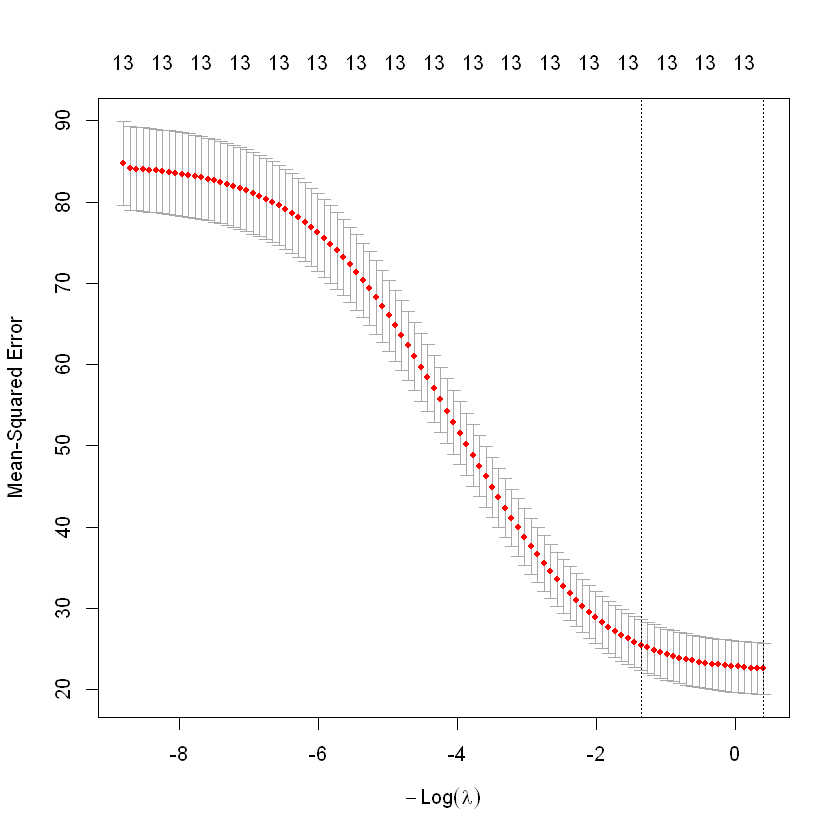

In [ ]:
# 3. Visualizar o erro (MSE) em função de log(Lambda)


plot(cv_ridge)


# Lambda ideal (mínimo MSE)
lambda_min <- cv_ridge$lambda.min


cat("Lambda Mínimo (L2):", lambda_min, "\n")

In [6]:
# Análise e Previsão	
# 4. Coeficientes no Lambda ideal (Nota: Coeficientes encolhem, mas não zeram)


coef(cv_ridge, s = lambda_min)

# Previsão no conjunto de teste
previsoes_ridge <- predict(cv_ridge, s = lambda_min, newx = X_teste)


# Avaliação (RMSE)
rmse_ridge <- sqrt(mean((previsoes_ridge - y_teste)^2))


cat("RMSE (Regressão Ridge):", round(rmse_ridge, 3), "\n")

14 x 1 sparse Matrix of class "dgCMatrix"
              s=0.6614818
(Intercept)  28.531289536
crim         -0.077720407
zn            0.030879653
indus        -0.041278474
chas          3.113445921
nox         -12.889455184
rm            4.372386807
age          -0.003672689
dis          -1.211817374
rad           0.144525556
tax          -0.006525876
ptratio      -0.961095853
black         0.009002453
lstat        -0.419541780

RMSE (Regressão Ridge): 5.197 
